## 🤖 Modelos Prditivos  de Machine Learning - Previsão de Vendas de Cancelamento da Operadora Telecom X – Parte 2: Prevendo Churn
 <br>

### Um breve resumo do que iremos fazer<br>
<p> 1 - Analise Exploratória das variáveis Categóricas e Numéricas utilizando diversos gráficos<br>    
<p> 2 - Identificar e Tratar OUTLIERS e Valores Missing<br>    
<p> 3 - Balanceamento da variavél Target<br>    
<p> 4 - OneHotEncoding e Normaloização de Dados <br>
<p> 4 - Criar, Treinar e Avaliar o Algoritmo de Machine Learning <br><br>
    
E muito mais...


# ✅Importação das Bibliotecas que Vamos Utilizar  e Conjunto de Dados.

In [250]:
# Importando os pacotes que serão utilizados

# Para manipulação e tratamento dos dados
import numpy as np
import pandas as pd
import time #utilizada para funções de tempo
import matplotlib.pyplot as plt #Utilizada para gráficos
import seaborn as sns #Utilizada para gráficos


# Bibliotecas do Skit Learn
from sklearn.model_selection import train_test_split #Utilizada para separar dados pra treino e teste
from sklearn.preprocessing import StandardScaler #Utilizada para fazer a padronização dos dados
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import accuracy_score #Utilizada para avaliar a acurácia do modelo preditivo
from sklearn.neighbors import KNeighborsClassifier #Nosso Algoritmo para criação do modelo
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados
from sklearn.preprocessing import StandardScaler # Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import MinMaxScaler # Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import LabelEncoder # Utilizado para fazer o OneHotEncoding
from sklearn.linear_model import LinearRegression # Algoritmo de Regressão Linear
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


# Para remover avisos de alerta
import warnings #Utilizada para avisos de alertas
warnings.filterwarnings("ignore") #Ignorar avisos de alertas. Obs.: Alertas NÃO são erros, são apenas mensagens informativas

# Para não limitar a exibição do DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

 # Analise Exploratória dos Dados e  das variáveis Categóricas e Numéricas utilizando diversos gráficos

In [251]:
# Carregue o arquivo CSV para um DataFrame do pandas.
try:
    dados = pd.read_csv('/content/df_plano.csv')
    print("DataSet carregado com sucesso!")
except FileNotFoundError:
    print("Erro: O arquivo 'telecom_churn.csv' não foi encontrado. Verifique o caminho.")
    # Saia do script se o arquivo não for encontrado para evitar erros subsequentes.
    exit()

DataSet carregado com sucesso!


In [252]:
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.90,267.40


In [253]:
dados.shape

(7043, 22)

In [254]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [255]:
# Por Padão a Coluna de Id Não Há Necessidade de seguir em nossa base de Dados
dados.drop(['customerID'], axis=1, inplace=True)

📌 multicolinearidade e simplificar as variáveis, sem comprometer a performance do modelo. O problema original era que variáveis como OnlineSecurity e StreamingTV tinham três categorias: "Yes", "No", e "No internet service", criando correlação 1.0 entre as dummies e VIF infinito. Ao agrupar "No internet service" como "No", evitamos esse problema, reduzindo a dimensionalidade e mantendo a informação relevante em InternetService. Embora perdemos a nuance sobre o motivo de não usar o serviço, a solução melhora a robustez do modelo e reduz o ruído.








Perguntar ao ChatGPT


In [256]:
# para criar um novo
#df_clean = dados.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    dados[col] = dados[col].replace('No internet service', 'No')


In [257]:
dados.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.90,267.40


In [258]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7043 non-null   object 
 2   customer.SeniorCitizen     7043 non-null   int64  
 3   customer.Partner           7043 non-null   object 
 4   customer.Dependents        7043 non-null   object 
 5   customer.tenure            7043 non-null   int64  
 6   phone.PhoneService         7043 non-null   object 
 7   phone.MultipleLines        7043 non-null   object 
 8   internet.InternetService   7043 non-null   object 
 9   internet.OnlineSecurity    7043 non-null   object 
 10  internet.OnlineBackup      7043 non-null   object 
 11  internet.DeviceProtection  7043 non-null   object 
 12  internet.TechSupport       7043 non-null   object 
 13  internet.StreamingTV       7043 non-null   objec

In [259]:
dados.isna().sum()

,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0
internet.OnlineSecurity,0


###📌 Como são 11 valores em cada coluna voçê pode excluir ou aplicar a mediana para não perder os dados.

  #### Preencheremos os valores NULOS com a mediana dos dados.

In [260]:
# Como sã0 11 valores em cada coluna voçê pode excluir ou aplicar a mediana para nã perder os dados
# Preencheremos os valores NULOS com a mediana dos dados
dados['Total.Day'] = dados['Total.Day'].fillna((dados['Total.Day'].median()))
dados['account.Charges.Total'] = dados['account.Charges.Total'].fillna((dados['account.Charges.Total'].median()))
dados.isna().sum()

,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0
internet.OnlineSecurity,0


In [261]:
dados.describe()

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total
count,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.16,32.37,2.16,64.76,2281.92
std,0.37,24.56,1.01,30.09,2265.27
min,0.00,0.00,0.46,18.25,18.80
25%,0.00,9.00,1.21,35.50,402.23
50%,0.00,29.00,2.35,70.35,1397.47
75%,0.00,55.00,3.01,89.85,3786.60
max,1.00,72.00,4.05,118.75,8684.80


In [262]:
# Verificando Valores Únicos ou binarios
dados.nunique()


,0
Churn,2
customer.gender,2
customer.SeniorCitizen,2
customer.Partner,2
customer.Dependents,2
customer.tenure,73
phone.PhoneService,2
phone.MultipleLines,3
internet.InternetService,3
internet.OnlineSecurity,2


 # 📌Carregar variaveis para  um plot
 ### 📌Pegaremos a partir da variavel 1 porque o ID_CLIENTE não iremos utilizar
 ### 📌Cria uma lista vazia onde serão armazenados os nomes das colunas numéricas


In [263]:
variaveis_numericas = []

# Percorre as colunas do DataFrame dados, da posição 1 até a 23 (índice 1 a 23, pois o Python é zero-based)
for i in dados.columns[0:22].tolist():

    # Verifica se o tipo de dado da coluna atual é 'int64' ou 'float64' (números inteiros ou reais)
    if dados.dtypes[i] == 'int64' or dados.dtypes[i] == 'float64':

        # Imprime o nome da coluna e o tipo de dado dela
        print(i, ':', dados.dtypes[i])

        # Adiciona o nome da coluna à lista de variáveis numéricas
        variaveis_numericas.append(i)


customer.SeniorCitizen : int64
customer.tenure : int64
Total.Day : float64
account.Charges.Monthly : float64
account.Charges.Total : float64


### 📌Podemos observar nos boxplots abaixo que algumas variáveis numéricas apresentam uma grande quantidade de "possíveis" outliers
### 📌Precisamos avaliar cada uma dessas variáveis dentro do contexto dos dados para saber se realmente iremos tratá-las como outliers



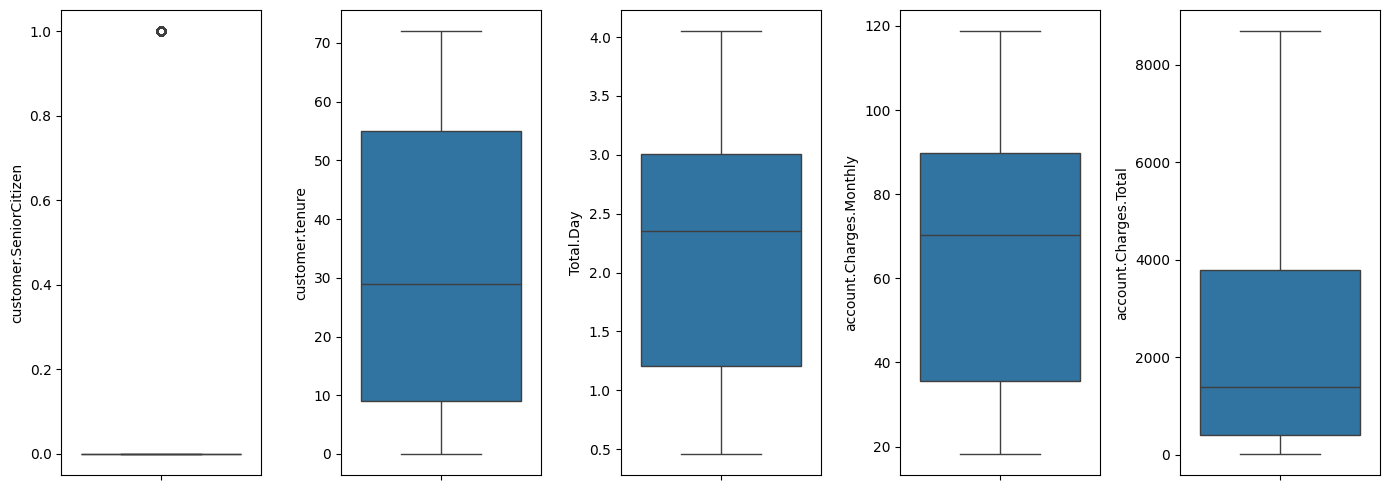

In [264]:
# Define o tamanho da figura em polegadas: largura = 14, altura = 5
plt.rcParams["figure.figsize"] = [14.00, 5.00]

# Garante que os elementos do gráfico se ajustem automaticamente ao layout
plt.rcParams["figure.autolayout"] = True

# Como temos 5 variáveis, podemos criar uma grade de 1 linha e 5 colunas
f, axes = plt.subplots(1, 5)  # 1 linha e 5 colunas

# Inicializa a posição dos gráficos
coluna = 0

# Percorre todas as variáveis numéricas selecionadas
for i in variaveis_numericas[:5]:  # Seleciona as primeiras 5 variáveis numéricas
    # Cria um boxplot para a variável i na posição [0][coluna] da grade
    sns.boxplot(data=dados, y=i, ax=axes[coluna])

    # Avança para a próxima coluna
    coluna += 1

# Exibe todos os gráficos gerados
plt.show()


In [265]:
# Lista para armazenar as variáveis categóricas
variaveis_categoricas = []

# Itera sobre as colunas de 0 até a 47 (isso seleciona as primeiras 48 colunas)
for i in dados.columns[0:23]:  # Corrigindo a iteração para cada coluna
    if dados.dtypes[i] == 'object' or dados.dtypes[i] == 'category':
        # Imprime o nome da variável e o seu tipo
        print(i, ':', dados.dtypes[i])
        # Adiciona a variável à lista de variáveis categóricas
        variaveis_categoricas.append(i)


# Exibe as variáveis categóricas identificadas
print("Variáveis categóricas:",len(variaveis_categoricas), variaveis_categoricas)


Churn : object
customer.gender : object
customer.Partner : object
customer.Dependents : object
phone.PhoneService : object
phone.MultipleLines : object
internet.InternetService : object
internet.OnlineSecurity : object
internet.OnlineBackup : object
internet.DeviceProtection : object
internet.TechSupport : object
internet.StreamingTV : object
internet.StreamingMovies : object
account.Contract : object
account.PaperlessBilling : object
account.PaymentMethod : object
Variáveis categóricas: 16 ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']


# 📌Com este comando iremos exibir todos gráficos de todas colunas de uma vez só para facilitar nossa análise.

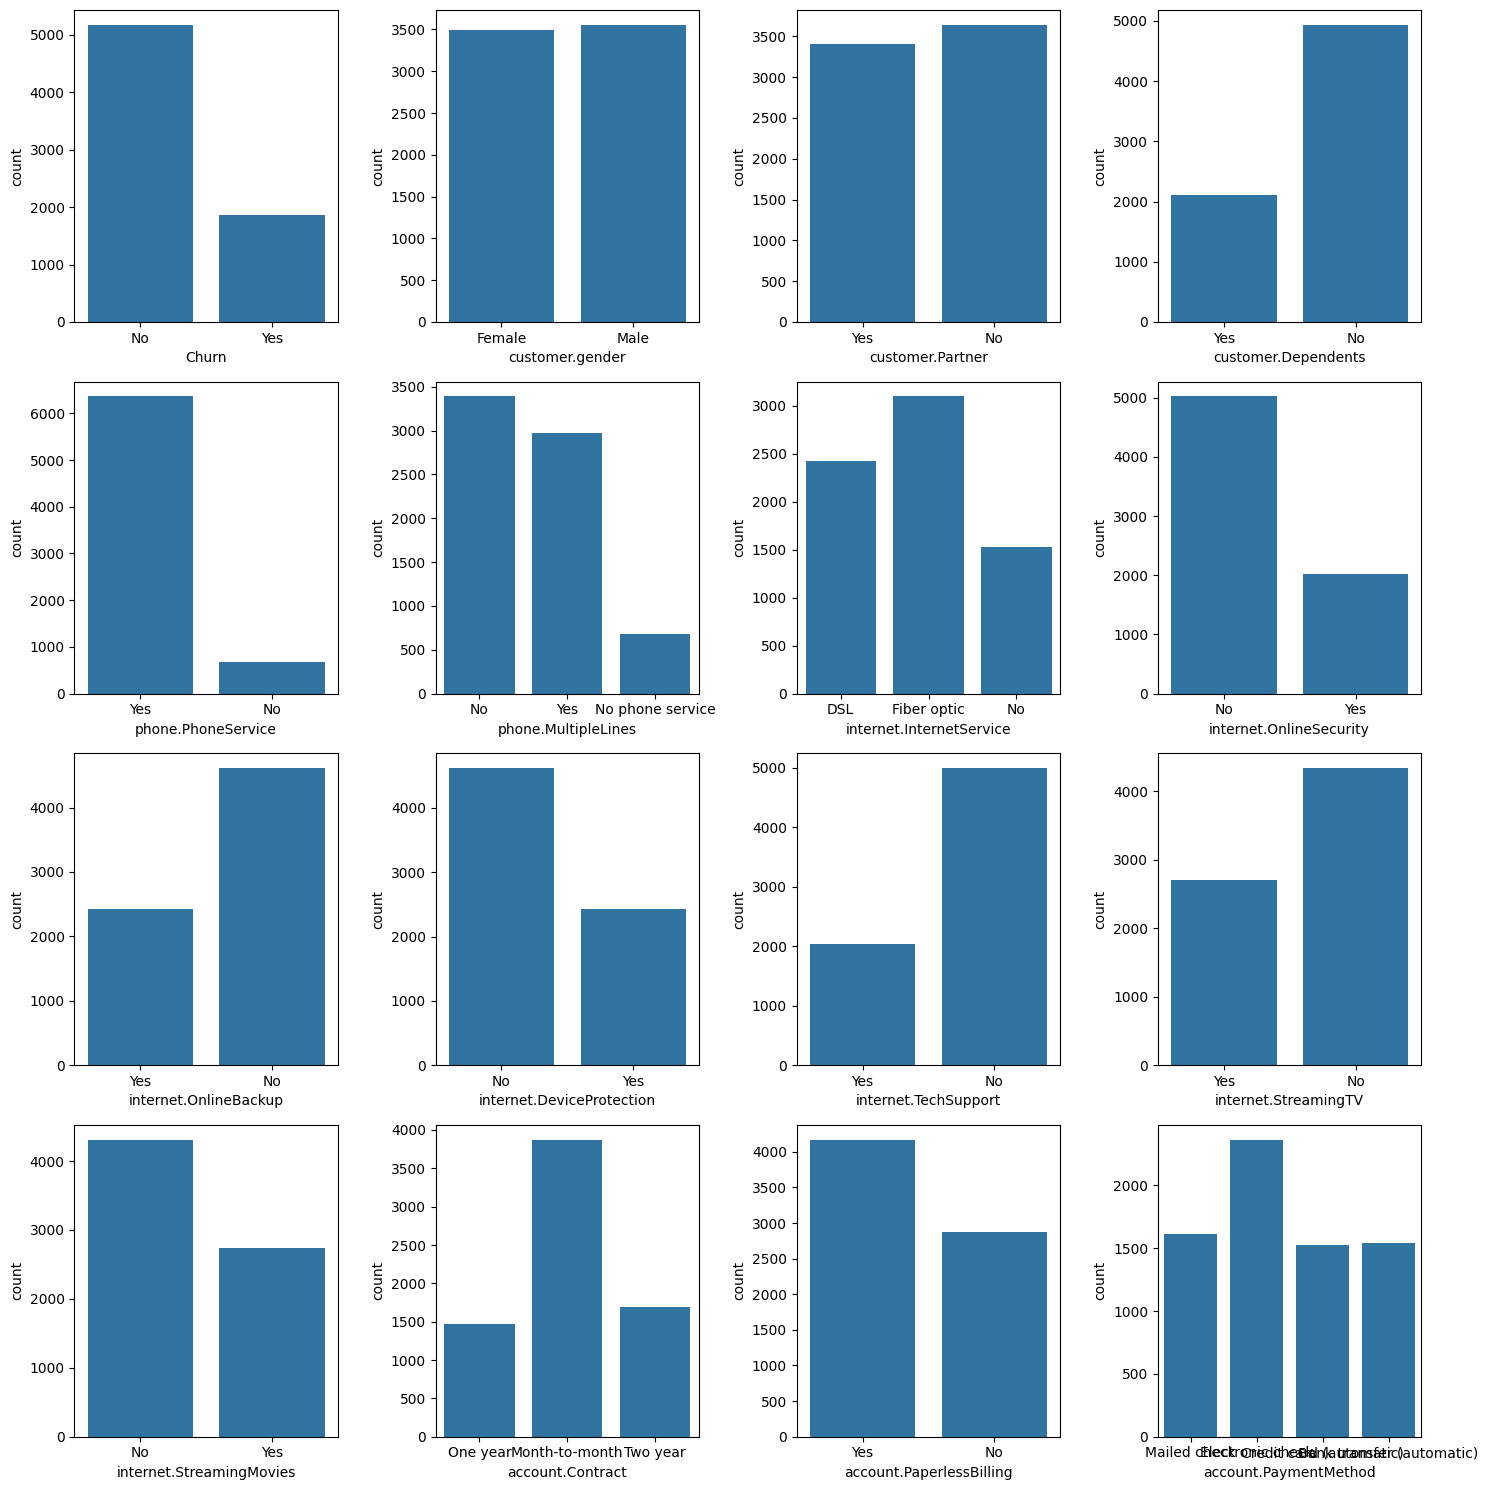

In [266]:
# Com este comando iremos exibir todos gráficos de todas colunas de uma vez só para facilitar nossa análise.

# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 15.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
# Usando 5 linhas e 4 colunas para acomodar 17 gráficos
f, axes = plt.subplots(4, 4)  # 5 linhas e 4 colunas (total de 20 gráficos)

# Inicializa a posição dos gráficos
linha = 0
coluna = 0

# Itera sobre as variáveis categóricas
for i in variaveis_categoricas:
    # Verifica se a posição de coluna excedeu o número de colunas (4)
    sns.countplot(data=dados, x=i, ax=axes[linha][coluna])

    coluna += 1
    if coluna == 4:  # Quando atingir a 4ª coluna, vai para a próxima linha
        linha += 1
        coluna = 0

# Ajusta o layout para que todos os gráficos sejam exibidos corretamente
plt.tight_layout()

# Exibe os gráficos
plt.show()


##📌Vamos gerar um gráfico de histograma para avaliar a distribuição dos dados
##📌Podemos observar que neste caso os dados estão bem dispersos

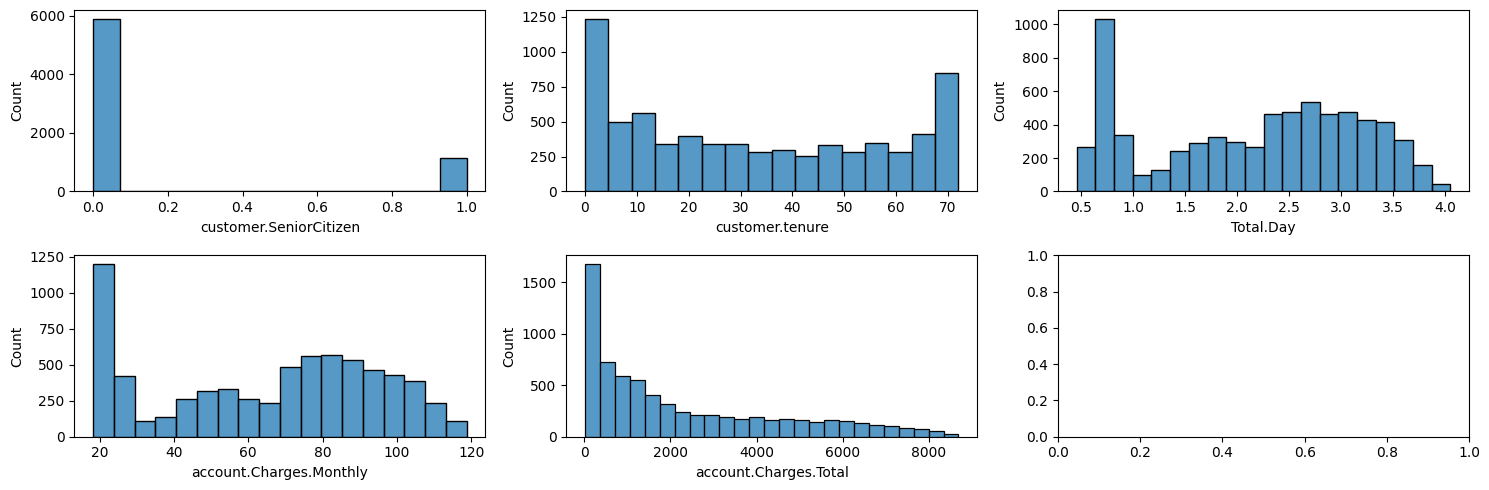

In [267]:
# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 5.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(2, 3) #4 linhas e 3 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.histplot(data = dados, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0

plt.show()

In [268]:
dados.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.90,267.40


# Pré Processamento dos Dados

In [269]:
variaveis_categoricas

['Churn',
 'customer.gender',
 'customer.Partner',
 'customer.Dependents',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod']

In [270]:
#dados = pd.get_dummies(dados, columns=variaveis_categoricas, drop_first=True)
#dados.head()

In [271]:
# Mapeia a variável alvo e outras binárias para 0 e 1
# Isso evita que o LabelEncoder atribua a ordem errada

mapa_binario = {'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1}
colunas_para_mapear = ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']

for col in colunas_para_mapear:
    # Apenas mapeia se a coluna ainda for do tipo 'object'
    if dados[col].dtype == 'object':
        dados[col] = dados[col].map(mapa_binario)

# Identifica colunas multinomiais que ainda são 'object'
colunas_multinomiais = dados.select_dtypes(include=['object']).columns

# Aplica One-Hot Encoding (get_dummies)
dados = pd.get_dummies(dados, columns=colunas_multinomiais, drop_first=True)

print("Dados após One-Hot Encoding:")
dados.head()

Dados após One-Hot Encoding:


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,Total.Day,account.Charges.Monthly,account.Charges.Total,phone.MultipleLines_No phone service,phone.MultipleLines_Yes,internet.InternetService_Fiber optic,internet.InternetService_No,internet.OnlineSecurity_Yes,internet.OnlineBackup_Yes,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,1,2.20,65.60,593.30,False,False,False,False,False,True,False,True,True,False,True,False,False,False,True
1,0,1,0,0,0,9,1,0,2.01,59.90,542.40,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
2,1,1,0,0,0,4,1,1,2.34,73.90,280.85,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
3,1,1,1,1,0,13,1,1,3.17,98.00,1237.85,False,False,True,False,False,True,True,False,True,True,False,False,False,True,False
4,1,0,1,1,0,3,1,1,2.97,83.90,267.40,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True


🔄 Normalização dos dados

A normalização é uma etapa comum no pré-processamento de dados, especialmente importante para algoritmos que são **sensíveis à escala dos atributos**, como:

* KNN (K-Nearest Neighbors)
* Redes Neurais
* Regressão Logística
* SVM (Support Vector Machine)

Modelos baseados em árvores (como Decision Tree, Random Forest e XGBoost) **não exigem normalização**, pois não dependem da escala dos dados para construir suas regras de decisão.

Neste projeto, aplicaremos a **normalização Min-Max**, que transforma os valores para o intervalo **\[0, 1]**. Isso ajuda a garantir que todas as variáveis numéricas contribuam de forma equilibrada para o modelo.


In [272]:
# Vamos aplicar a normalização

# Selecionando apenas colunas numéricas (exceto a variável target, se já estiver separada)
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

# Inicializando o scaler
scaler = MinMaxScaler()

# Aplicando a normalização
dados[colunas_numericas] = scaler.fit_transform(dados[colunas_numericas])

# Exibindo os dados normalizados
dados.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,Total.Day,account.Charges.Monthly,account.Charges.Total,phone.MultipleLines_No phone service,phone.MultipleLines_Yes,internet.InternetService_Fiber optic,internet.InternetService_No,internet.OnlineSecurity_Yes,internet.OnlineBackup_Yes,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0.00,0.00,0.00,1.00,1.00,0.12,1.00,1.00,0.48,0.47,0.07,False,False,False,False,False,True,False,True,True,False,True,False,False,False,True
1,0.00,1.00,0.00,0.00,0.00,0.12,1.00,0.00,0.43,0.41,0.06,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
2,1.00,1.00,0.00,0.00,0.00,0.06,1.00,1.00,0.52,0.55,0.03,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
3,1.00,1.00,1.00,1.00,0.00,0.18,1.00,1.00,0.75,0.79,0.14,False,False,True,False,False,True,True,False,True,True,False,False,False,True,False
4,1.00,0.00,1.00,1.00,0.00,0.04,1.00,1.00,0.70,0.65,0.03,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True


## ≡ Correlação entre as variáveis



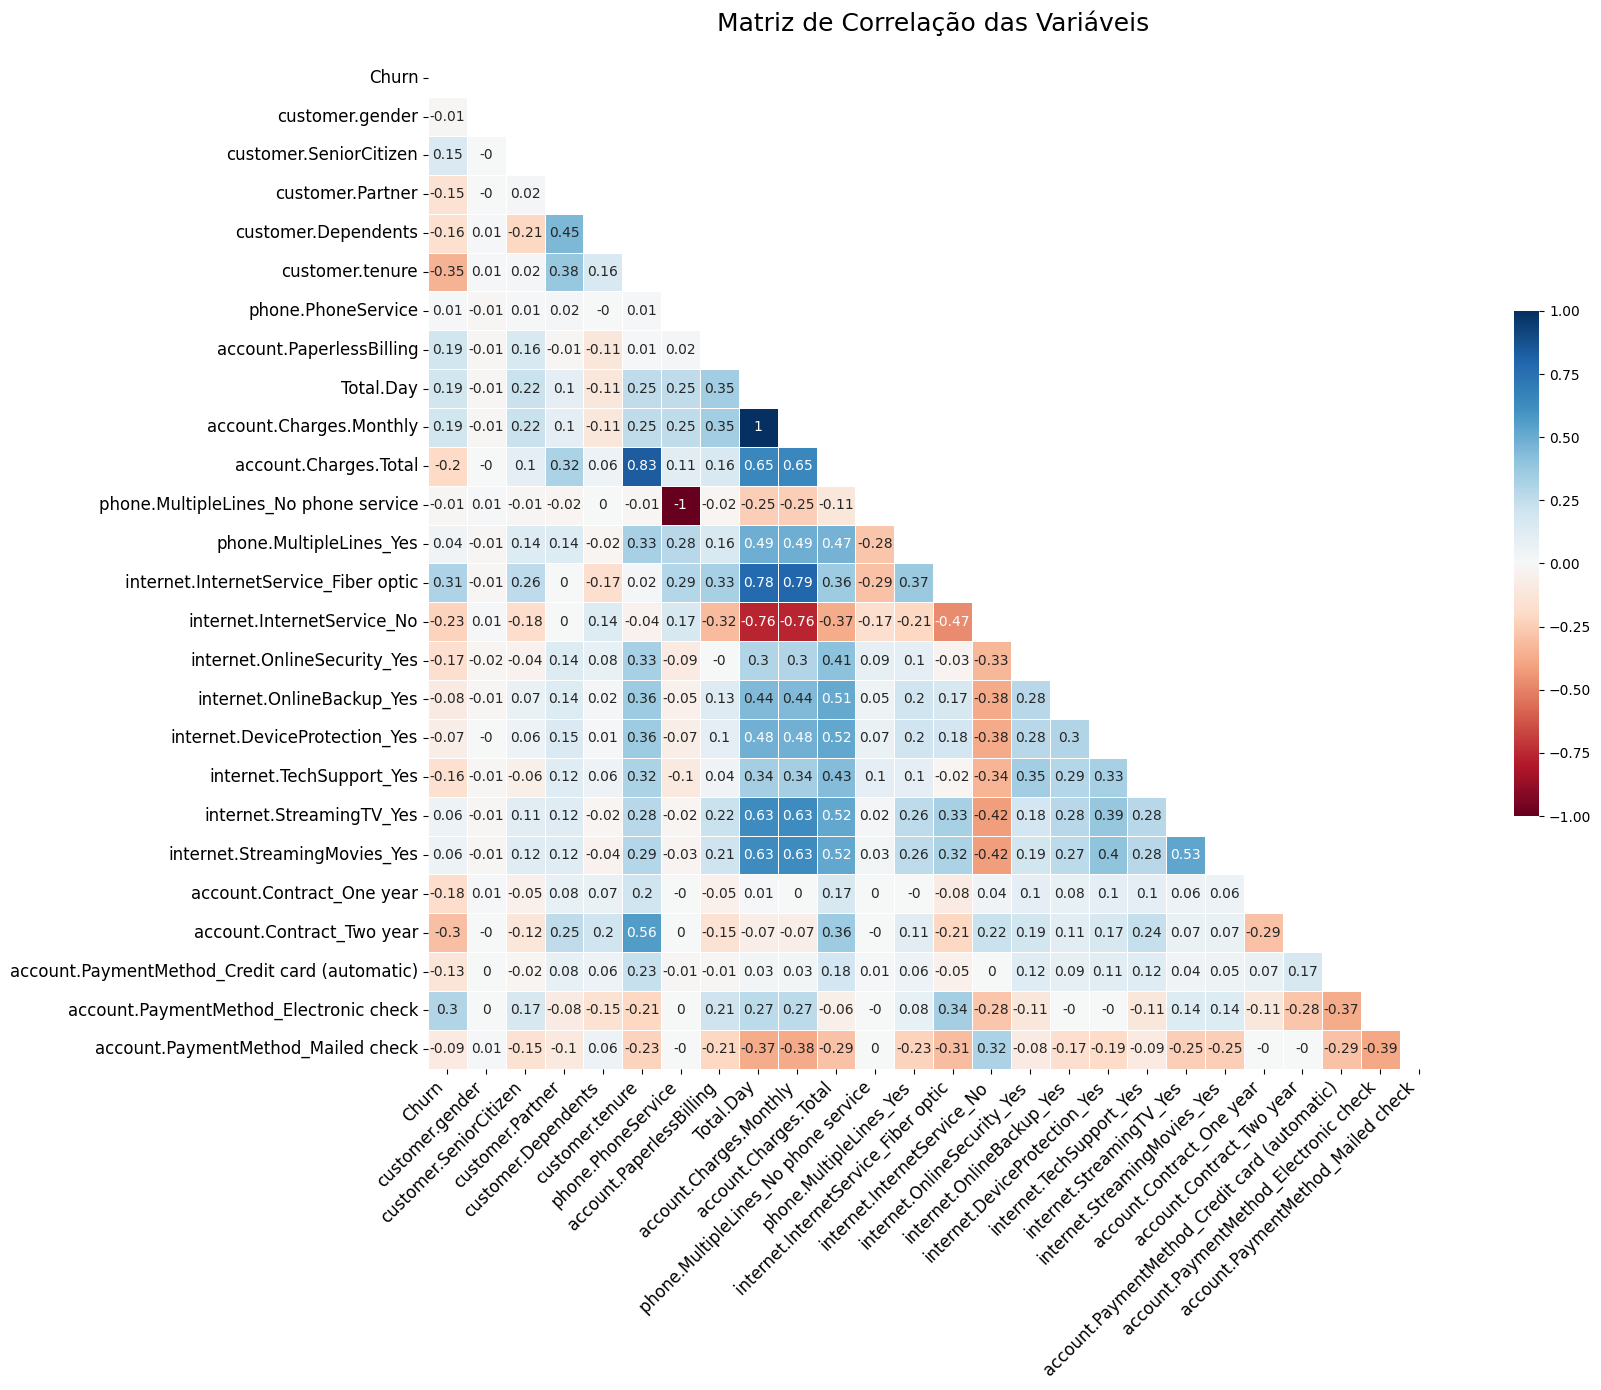

In [273]:
corr = dados.corr(numeric_only=True)

# Cria uma máscara para ocultar a parte superior da matriz (duplicada)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configuração da figura
fig, ax = plt.subplots(figsize=(18, 14))

# Heatmap estilizado
sns.heatmap(
    np.round(corr, 2),
    mask=mask,               # Máscara triangular
    cmap='RdBu',             # Mapa de cores contrastante
    vmax=1, vmin=-1, center=0,
    square=True,
    linewidths=.5,
    annot=True,              # Mostrar valores
    annot_kws={"size": 10},   # Tamanho do texto
    cbar_kws={"shrink": .5}   # Barra de cores menor
)

# Ajusta rótulos
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Título
plt.title('Matriz de Correlação das Variáveis', fontsize=18, pad=20)

plt.show()



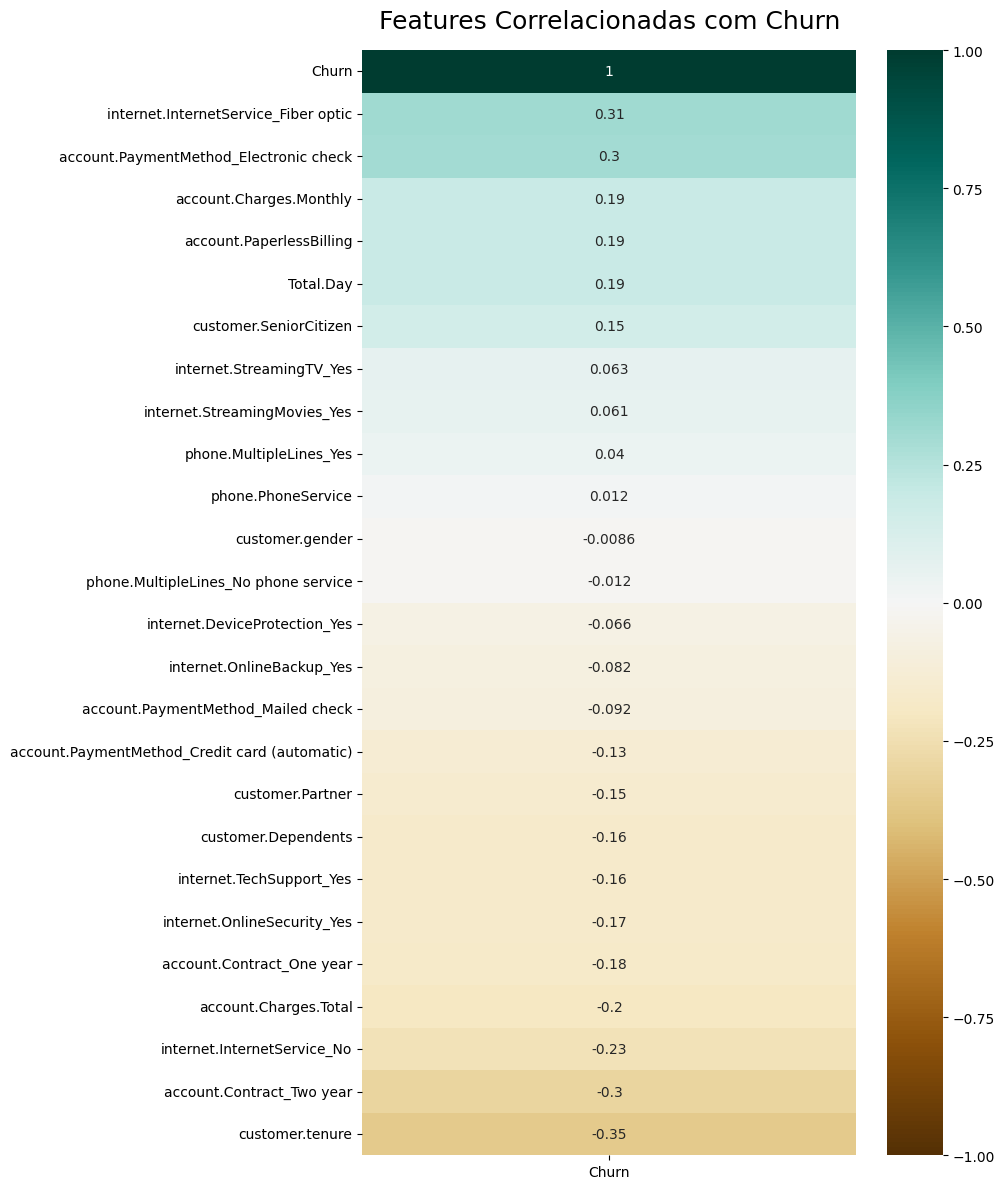

In [274]:
plt.figure(figsize=(10, 12))

# Calcula a matriz de correlação do DataFrame e filtra para mostrar apenas as correlações com 'Churn'
# Ordena os valores para visualizar facilmente os fatores mais correlacionados (positiva ou negativamente)
heatmap = sns.heatmap(
    dados.corr(numeric_only=True)[['Churn']].sort_values(by='Churn', ascending=False),
    vmin=-1, vmax=1, annot=True, cmap='BrBG'
)

# Título do gráfico
heatmap.set_title('Features Correlacionadas com Churn', fontdict={'fontsize': 18}, pad=16)
plt.show()

In [275]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   float64
 1   customer.gender                                7043 non-null   float64
 2   customer.SeniorCitizen                         7043 non-null   float64
 3   customer.Partner                               7043 non-null   float64
 4   customer.Dependents                            7043 non-null   float64
 5   customer.tenure                                7043 non-null   float64
 6   phone.PhoneService                             7043 non-null   float64
 7   account.PaperlessBilling                       7043 non-null   float64
 8   Total.Day                                      7043 non-null   float64
 9   account.Charges.Monthly                        7043 

In [276]:
dados.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,Total.Day,account.Charges.Monthly,account.Charges.Total,phone.MultipleLines_No phone service,phone.MultipleLines_Yes,internet.InternetService_Fiber optic,internet.InternetService_No,internet.OnlineSecurity_Yes,internet.OnlineBackup_Yes,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0.00,0.00,0.00,1.00,1.00,0.12,1.00,1.00,0.48,0.47,0.07,False,False,False,False,False,True,False,True,True,False,True,False,False,False,True
1,0.00,1.00,0.00,0.00,0.00,0.12,1.00,0.00,0.43,0.41,0.06,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
2,1.00,1.00,0.00,0.00,0.00,0.06,1.00,1.00,0.52,0.55,0.03,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
3,1.00,1.00,1.00,1.00,0.00,0.18,1.00,1.00,0.75,0.79,0.14,False,False,True,False,False,True,True,False,True,True,False,False,False,True,False
4,1.00,0.00,1.00,1.00,0.00,0.04,1.00,1.00,0.70,0.65,0.03,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True


In [277]:
# 1. Separar X e y do dataframe original (antes do SMOTE)
X = dados.drop('Churn', axis=1)
y = dados['Churn']


# Divisão em Dados de Treino e Teste com dados Normalizados.

In [278]:
# 2. Dividir em dados de treino e teste PRIMEIRO
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=40)

# Balanceamento de Classe - Oversampling

In [279]:
# Exibe a distribuição normalizada da variável 'Churn' em percentual
churn_distribution = dados['Churn'].value_counts(normalize=True) * 100

# Exibe os resultados com duas casas decimais
print(churn_distribution.apply(lambda x: f'{x:.2f}%'))


Churn
0.00    73.46%
1.00    26.54%
Name: proportion, dtype: object


In [280]:
# 3. Aplicar o SMOTE APENAS nos dados de treino
seed = 100
smote_bal = SMOTE(random_state=seed)
X_treino_res, y_treino_res = smote_bal.fit_resample(X_treino, y_treino)

In [281]:
# Exibe a distribuição das classes após o balanceamento
print("\nDistribuição das classes após o balanceamento:")
print(y.value_counts())

# Exibe o número de amostras antes e depois
print(f"\nNúmero de amostras antes do balanceamento: {len(y)}")
print(f"Número de amostras após o balanceamento: {len(y)}")



Distribuição das classes após o balanceamento:
Churn
0.00    5174
1.00    1869
Name: count, dtype: int64

Número de amostras antes do balanceamento: 7043
Número de amostras após o balanceamento: 7043


# 🤖Criar, avaliar e testar nosso modelo preditivo

# KNN (K-Nearest Neighbors)
O modelo KNN é eficaz e simples, especialmente em cenários em que a relação entre as variáveis é local e a quantidade de dados não é excessivamente grande. Porém, devido a suas limitações, como alto custo computacional e sensibilidade à dimensionalidade dos dados, ele não é recomendado para grandes volumes de dados ou para problemas com alta dimensionalidade. Também requer atenção especial para a escolha do valor de K e a normalização dos dados.

In [282]:
# Range de valores de k que iremos testar
kVals = range(3, 10, 2)

# Lista vazia para receber as acurácias
acuracias = []
start = time.time()

# Loop para treinar e avaliar o modelo para cada valor de k
for k in kVals:
    # Treinando o modelo KNN com cada valor de k
    modeloKNN = KNeighborsClassifier(n_neighbors=k)
    modeloKNN.fit(X_treino_res, y_treino_res)

    # Avaliando o modelo e atualizando a lista de acurácias
    score = modeloKNN.score(X_teste, y_teste)
    print(f"Com valor de k = {k}, a acurácia é = {score * 100:.2f}%")
    acuracias.append(score)

# Obtendo o valor de k que apresentou a maior acurácia
i = np.argmax(acuracias)
print(f"\nO valor de k = {kVals[i]} alcançou a mais alta acurácia de {acuracias[i] * 100:.2f}% nos dados de validação!")

end = time.time()
print('Tempo de Treinamento do Modelo:', end - start)

# Criando a versão final do modelo com o maior valor de k
modeloFinal = KNeighborsClassifier(n_neighbors=kVals[i])
modeloFinal.fit(X_treino, y_treino)

# Previsões com os dados de teste
previsoes = modeloFinal.predict(X_teste)

# Calculando a acurácia do modelo final
acuracia = accuracy_score(y_teste, previsoes)

# Exibindo a acurácia formatada em percentual
print(f'Acurácia do modelo final: {acuracia * 100:.2f}%')


Com valor de k = 3, a acurácia é = 67.82%
Com valor de k = 5, a acurácia é = 69.05%
Com valor de k = 7, a acurácia é = 69.52%
Com valor de k = 9, a acurácia é = 69.66%

O valor de k = 9 alcançou a mais alta acurácia de 69.66% nos dados de validação!
Tempo de Treinamento do Modelo: 0.4404175281524658
Acurácia do modelo final: 77.14%


# Regressão Logística

In [283]:
# Instanciar e treinar
lr = LogisticRegression(random_state=42)
lr.fit(X_treino_res, y_treino_res)

# Previsões
y_pred_lr = lr.predict(X_teste)
y_prob_lr = lr.predict_proba(X_teste)[:, 1]

# Avaliação
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_teste, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_teste, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_teste, y_pred_lr))
print(classification_report(y_teste, y_pred_lr))

Regressão Logística
Acurácia: 0.7581637482252721
ROC AUC: 0.8442024859933401
Matriz de Confusão:
 [[1168  394]
 [ 117  434]]
              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82      1562
         1.0       0.52      0.79      0.63       551

    accuracy                           0.76      2113
   macro avg       0.72      0.77      0.72      2113
weighted avg       0.81      0.76      0.77      2113



# Random Forest

In [284]:
# Definição do modelo base
rf = RandomForestClassifier(random_state=42)

# Grade de parâmetros para testar
param_grid = {
    'n_estimators': [100, 200, 300],       # número de árvores
    'max_depth': [10, 20],        # profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],       # mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],         # mínimo de amostras por folha
    'max_features': ['sqrt', 'log2']       # como selecionar features em cada divisão
}

# Busca em grade com validação cruzada
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                     # 5-fold cross validation
    scoring='roc_auc',        # métrica alvo
    n_jobs=-1,                 # usar todos os núcleos disponíveis
    verbose=2
)

# Treinamento
grid_search.fit(X_treino_res, y_treino_res)

print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print("Melhor pontuação ROC AUC:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores parâmetros encontrados:
{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Melhor pontuação ROC AUC: 0.9248240338201821


In [285]:
# Melhor modelo encontrado
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("="*60)
print(" 🎯 MELHOR MODELO PARA ESTA ANÁLISE 🎯 ".center(60, " "))
print("="*60)
print("\n📌 Modelo escolhido: RandomForestClassifier")
print(f"🔹 Melhores parâmetros: {best_params}")
print(f"📊 Melhor ROC AUC: {best_score:.4f}")
print("\n✅ Este modelo apresentou a melhor performance entre os testados e será utilizado para as próximas etapas da análise.")
print("="*60)


            🎯 MELHOR MODELO PARA ESTA ANÁLISE 🎯             

📌 Modelo escolhido: RandomForestClassifier
🔹 Melhores parâmetros: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
📊 Melhor ROC AUC: 0.9248

✅ Este modelo apresentou a melhor performance entre os testados e será utilizado para as próximas etapas da análise.
